# Test Types
In this visuals we want to discorer the following

* Visualize what test types are being used the most.
* Visualize what test types give the most issues(blast and linter)
* Visualize the top 20 linting errors per linting type
* Visualize blast and linting apart

#### Importing our libraries and cleaned data

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from cleaning import read_data, clean_linting_results, clean_review_test_results, clean_data_reviewss, clean_data_exercises, clean_data_code_blast_tests

read_linting_results, read_review_test_results, read_reviews, data_tests, read_code_blast_tests, read_exercises, data_implementation_exercise = read_data()

data_linting_result = clean_linting_results(read_linting_results)
data_review_test_results = clean_review_test_results(read_review_test_results)
data_reviews = clean_data_reviewss(read_reviews)
data_exercises = clean_data_exercises(read_exercises)
data_code_blast_tests = clean_data_code_blast_tests(read_code_blast_tests)


#### What are the top 20 most common linting issues?

Below we have a list of the top 20 most common linter issues.

In [45]:
linting_error_codes = data_linting_result['message'].value_counts()
linting_error_codes.head(20)

The value of the “for” attribute of the “label” element must be the ID of a non-hidden form control.    25289
 Unexpected token.                                                                                      24405
Missing semicolon.                                                                                      24213
Expected indentation of 4 spaces but found 2.                                                           20769
Expected at least 1 space before "."; 0 found                                                           19739
Element “head” is missing a required instance of child element “title”.                                 19311
 Unexpected beginning of statement.                                                                     18179
Trailing spaces not allowed.                                                                            16970
Expected at least 1 space after "."; 0 found                                                            16569
Expected 1

### How many linting issues are there per test language?

Below we created a visual showing the ammount of linting issues filtered by test language

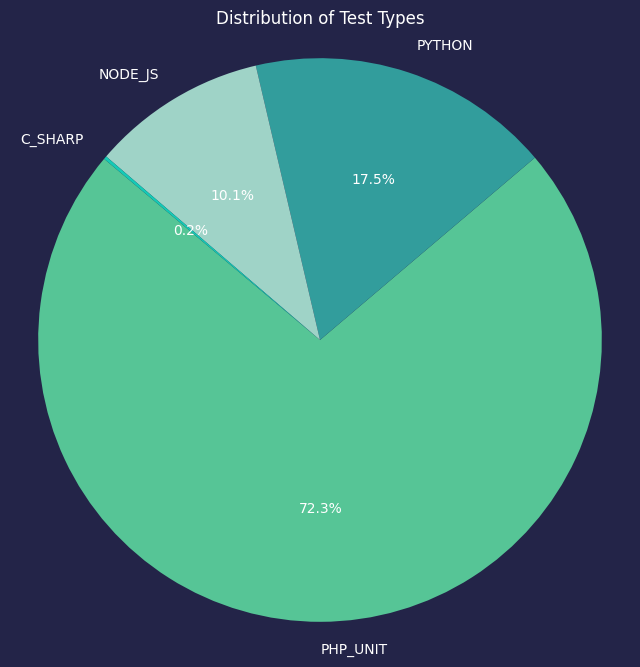

In [46]:
# Get the counts of unique values in the "test_type" column of the 'data_tests' DataFrame
unique_counts = data_tests["test_type"].value_counts()

# Adding colors to the pie chart
colors = ['#56C596', '#329D9C', '#9FD3C7', '#15CAB6']

# Create a pie chart
plt.figure(figsize=(8, 8), facecolor= '#232448')
plt.pie(unique_counts,
        labels=unique_counts.index,
        autopct='%1.1f%%',                      
        startangle=140,                         
        colors=colors,                          
        textprops={'color': 'white'}           
       )

# Set the title of the pie chart
plt.title("Distribution of Test Types", color='white')

# Set the aspect ratio to ensure a circular pie chart
plt.axis('equal')

# Display the pie chart
plt.show()


This data is unclear, php is sorted into multiple languages. Because of linting issues, lets find out what the real issues are.

### Finding the unique linting values per code language

Below we get a overview of the ammount of linting errors per code language. 

In [47]:
language_counts_linting = data_linting_result['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

print(language_counts_linting)


php     486192
html    326956
js      251930
css      98299
sql      78774
py        3669
htm       3231
inc          5
Name: 0, dtype: int64


#### Vissulazing linting error's

Below we created a clear overview of the ammount of linting errros per code language. 

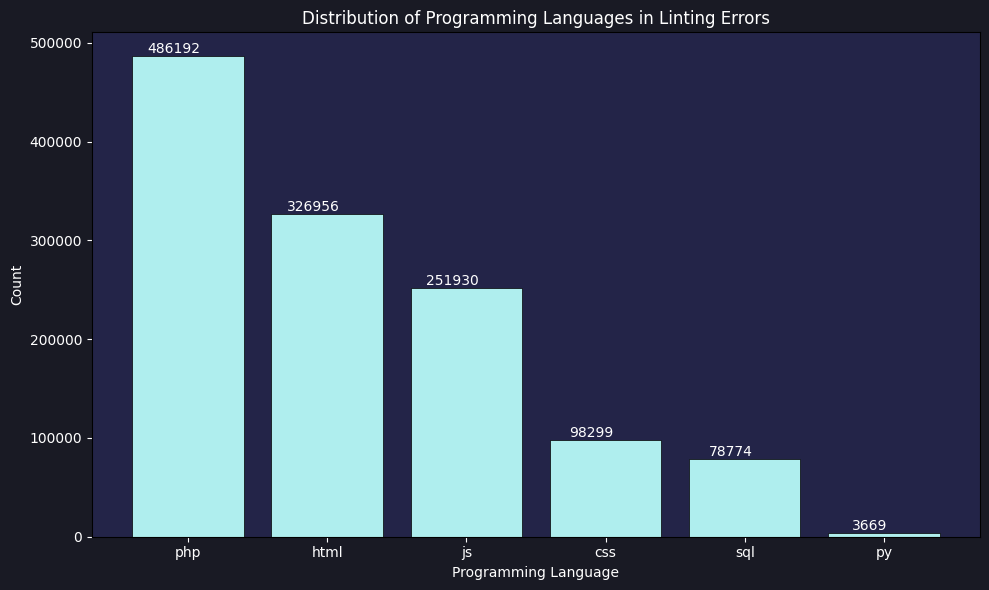

In [48]:
# Define a list of programming languages to be plotted
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']

# Filter the counts for specified languages from the 'language_counts_linting' DataFrame
filtered_counts = language_counts_linting[language_counts_linting.index.isin(languages_to_plot)]

# Create a subplot with specified size and background color
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#191A24')

# Create a bar plot
bars = plt.bar(filtered_counts.index,                
               filtered_counts,                        
               color='paleturquoise',           
               edgecolor='black',                       
               linewidth=0.5                            
              )

# Set labels for X and Y axes, and the title of the plot
plt.xlabel('Programming Language', color='white')
plt.ylabel('Count', color='white')
plt.title('Distribution of Programming Languages in Linting Errors', color='white')

# Add text labels on top of each bar showing the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, 
             bar.get_height() + 0.05, 
             str(int(bar.get_height())), 
             ha='center', 
             va='bottom', 
             color='white'
            )

# Set the color of tick labels on both X and Y axes
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Adjust layout for better visualization and set background color for the entire plot
plt.tight_layout()
ax.set_facecolor('#232448')

# Display the bar plot
plt.show()


In summary, our analysis indicates that while programming languages differ, linting errors show a consistent pattern across them. PHP exhibits the highest error count, closely followed by HTML. This underscores the universal importance of adhering to coding standards for cleaner, more maintainable code.

#### What are the top 20 linting issues per code language?

Below we created a list showing the top 20 linting issues per code language.

In [49]:
# Go through each programming language along with its count in the 'language_counts_linting' dictionary
for language, count in language_counts_linting.items():

# Filter the data for the specific language using file extensions
    language_data = data_linting_result[data_linting_result['file_name'].str.endswith(f'.{language}')]

# Count the occurrences of each linting error code for the specific language
    error_codes = language_data['message'].value_counts()

# Print the top 20 linting error codes for the current language
    print(f'Top 20 {language.upper()} Linting Error Codes:')
    print(error_codes.head(20))
    print('\n')


Top 20 PHP Linting Error Codes:
Expected at least 1 space before "."; 0 found                      19739
Expected at least 1 space after "."; 0 found                       16569
Expected 1 space(s) after closing parenthesis; found 0             16504
Expected 1 space after closing brace; newline found                16030
Line indented incorrectly; expected 0 spaces, found 4              15888
Line indented incorrectly; expected at least 4 spaces, found 0     13219
Line indented incorrectly; expected at least 8 spaces, found 4     11564
Space before opening parenthesis of function call prohibited       11192
Line indented incorrectly; expected 4 spaces, found 0              10935
Header blocks must be separated by a single blank line             10798
Blank line found at start of control structure                     10629
Expected 1 space(s) after closing parenthesis; found newline       10563
Opening brace should be on a new line                              10454
Line indented incor

#### Visualizing the linting errors per linting type

We can use this information to find out what the most common linting error is and in what code language.
We created this table visual the get easier acces to the data.

In [50]:
# Extract the programming language from the file name and create a new 'language' column in the DataFrame
data_linting_result['language'] = data_linting_result['file_name'].str.extract(r'\.(\w+)$')

# Group the linting result data by 'language' and 'message', then count the occurrences
linting_message_counts = data_linting_result.groupby(['language', 'message']).size().reset_index(name='count')

# For each language, select the top 20 linting messages based on count
top_messages_per_language = linting_message_counts.groupby('language').apply(lambda x: x.nlargest(20, 'count')).reset_index(drop=True)

# Sort the table data by language and count in descending order
top_messages_per_language = top_messages_per_language.sort_values(by=['language', 'count'], ascending=[True, False])

# Create a DataFrame with selected columns for table data
table_data = top_messages_per_language[['language', 'message', 'count']]

# Define colors for text and borders in the table
text_color = '#56C596'
border_color = '#191A24'

# Create a Figure using Plotly for a table visualization
fig = go.Figure(data=[go.Table(
    # Define table header with column names and styling
    header=dict(values=['<b>Language<b>', '<b>Message<b>', '<b>Count<b>'],
                fill_color=border_color,
                line_color=border_color,
                font=dict(color=text_color),
                align='left'),
    # Populate table cells with data and styling
    cells=dict(values=[table_data['language'], table_data['message'], table_data['count']],
               fill_color='#232448',
               line_color=border_color,
               font=dict(color=text_color),
               align='left'))
])

# Set layout parameters for the figure
fig.update_layout(
    height=600,
    autosize=True,
    margin=dict(l=0, r=0, b=0, t=0),
)

# Display the table using Plotly
fig.show()


#### How many blast issues are there in the dataset?

This code provides us with the ammount of blast issues in the dataset. We use this data

## Visualizing blast error's
Making the visual more specific by sepporate the linting and blast issues, here are the blast error's;

### Finding the unique blast values

C:\Users\mitzb\AppData\Local\Temp\ipykernel_18588\222326405.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



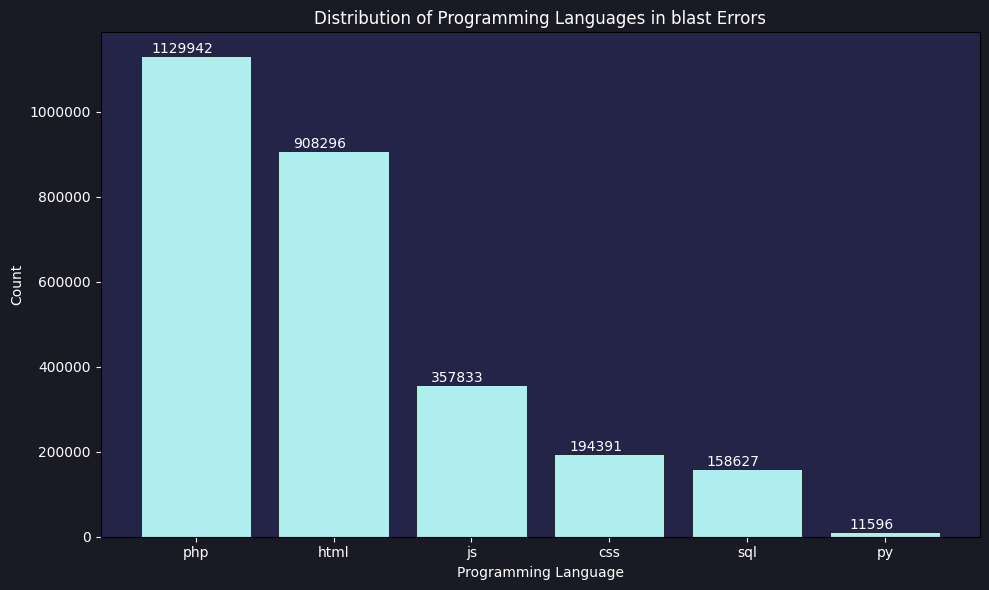

In [52]:
# Convert 'blast_review_id' columns to lowercase and remove leading/trailing whitespaces for both DataFrames
data_review_test_results['blast_review_id'] = data_review_test_results['blast_review_id'].str.lower().str.strip()
data_linting_result['blast_review_id'] = data_linting_result['blast_review_id'].str.lower().str.strip()

# Merge the two DataFrames on the 'blast_review_id' column using an inner join
merged_data = pd.merge(data_review_test_results, data_linting_result, on="blast_review_id", how="inner")

# Drop rows with missing values in the 'test_id' column
merged_data.dropna(subset=["test_id"], inplace=True)

# Get the programming languages from the 'file_name' column and count their occurrences
language_counts = merged_data['file_name'].str.extract(r'\.(\w+)$').loc[:, 0].value_counts()

# Define a list of programming languages to be plotted
languages_to_plot = ['php', 'html', 'sql', 'js', 'css', 'py']

# Filter language counts for the specified languages
filtered_counts = language_counts[language_counts.index.isin(languages_to_plot)]

# Create a bar plot with specified parameters
fig, ax = plt.subplots(figsize=(10, 6), facecolor='#191A24')
bars = plt.bar(filtered_counts.index, filtered_counts, color='paleturquoise', edgecolor='black', linewidth=0.5)

# Set labels for X and Y axes, and the title of the plot
plt.xlabel('Programming Language', color='white')
plt.ylabel('Count', color='white')
plt.title('Distribution of Programming Languages in blast Errors', color='white')

# Format y-axis labels in plain style
plt.ticklabel_format(axis='y', style='plain')

# Add text labels on top of each bar showing the count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(int(bar.get_height())), ha='center', va='bottom', color='white')

# Set the color of tick labels on both X and Y axes
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Adjust layout for better visualization and set background color for the entire plot
plt.tight_layout()
ax.set_facecolor('#232448')

# Display the plot
plt.show()


It is evident from the data that there are significantly more occurrences of blast errors than linting errors. PHP stands out as the programming language with the highest incidence of errors, followed closely by HTML. This observation underscores the importance of thorough testing and error handling, particularly in PHP and HTML development environments.